<a href="https://colab.research.google.com/github/vesv/ml_exercises/blob/main/Veselin_Velchev_Regression_California_Housing_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Importing libraries

In [ ]:
housing_pd = pd.read_csv('housing_coursework_entire_dataset_23-24.csv')
housing_pd.head()

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY


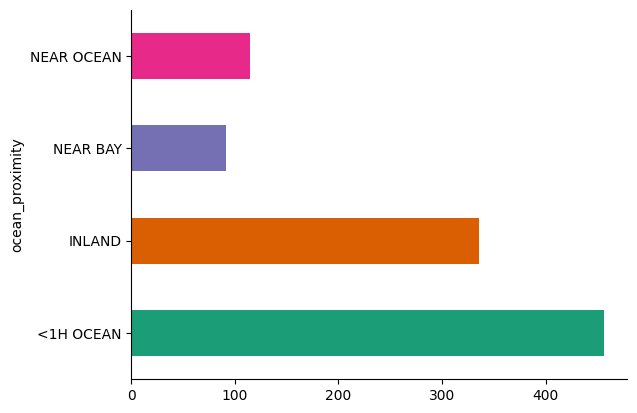

In [ ]:
# @title ocean_proximity

from matplotlib import pyplot as plt
import seaborn as sns
housing_pd.groupby('ocean_proximity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state = 1)
housing_pd_shuffled

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
507,508,-117.78,33.87,16,5609,952.0,2624,934,5.3307,169600,<1H OCEAN
818,819,-122.48,37.71,39,3615,632.0,1571,615,5.1149,314200,NEAR OCEAN
452,453,-118.53,34.45,10,5509,969.0,3002,959,5.5981,220100,<1H OCEAN
368,369,-118.23,33.90,45,1285,238.0,840,211,3.4107,112500,<1H OCEAN
242,243,-118.31,34.04,33,2691,726.0,2390,681,2.4048,208300,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...,...
767,768,-117.08,33.09,23,3792,624.0,1988,658,4.7566,178300,<1H OCEAN
72,73,-122.08,37.88,26,2947,NaN,825,626,2.9330,85000,NEAR BAY
908,909,-121.76,38.41,19,686,107.0,348,109,3.9306,93800,INLAND
235,236,-118.36,34.05,48,1825,404.0,728,363,3.3824,322600,<1H OCEAN


In [ ]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
507,1,0,0,0
818,0,0,0,1
452,1,0,0,0
368,1,0,0,0
242,1,0,0,0


In [ ]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()
#Replacing non-numeric values with numeric ones

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
507,508,-117.78,33.87,16,5609,952.0,2624,934,5.3307,169600
818,819,-122.48,37.71,39,3615,632.0,1571,615,5.1149,314200
452,453,-118.53,34.45,10,5509,969.0,3002,959,5.5981,220100
368,369,-118.23,33.90,45,1285,238.0,840,211,3.4107,112500
242,243,-118.31,34.04,33,2691,726.0,2390,681,2.4048,208300


In [ ]:
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1),
                              pd.get_dummies(housing_pd_shuffled['ocean_proximity'])], axis=1)
housing_pd_final

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
507,508,-117.78,33.87,16,5609,952.0,2624,934,5.3307,169600,1,0,0,0
818,819,-122.48,37.71,39,3615,632.0,1571,615,5.1149,314200,0,0,0,1
452,453,-118.53,34.45,10,5509,969.0,3002,959,5.5981,220100,1,0,0,0
368,369,-118.23,33.90,45,1285,238.0,840,211,3.4107,112500,1,0,0,0
242,243,-118.31,34.04,33,2691,726.0,2390,681,2.4048,208300,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,768,-117.08,33.09,23,3792,624.0,1988,658,4.7566,178300,1,0,0,0
72,73,-122.08,37.88,26,2947,NaN,825,626,2.9330,85000,0,0,1,0
908,909,-121.76,38.41,19,686,107.0,348,109,3.9306,93800,0,1,0,0
235,236,-118.36,34.05,48,1825,404.0,728,363,3.3824,322600,1,0,0,0


In [ ]:
#We no longer have columns that contain values which are unusable by our models.

In [ ]:
housing_pd_final = housing_pd_final[['longitude',	'latitude',	'housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households',	'median_income',	'<1H OCEAN',	'INLAND',	'NEAR BAY',	'NEAR OCEAN', 'median_house_value']]
housing_pd_final
#arrange columns so target value is at the end

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,median_house_value
507,-117.78,33.87,16,5609,952.0,2624,934,5.3307,1,0,0,0,169600
818,-122.48,37.71,39,3615,632.0,1571,615,5.1149,0,0,0,1,314200
452,-118.53,34.45,10,5509,969.0,3002,959,5.5981,1,0,0,0,220100
368,-118.23,33.90,45,1285,238.0,840,211,3.4107,1,0,0,0,112500
242,-118.31,34.04,33,2691,726.0,2390,681,2.4048,1,0,0,0,208300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,-117.08,33.09,23,3792,624.0,1988,658,4.7566,1,0,0,0,178300
72,-122.08,37.88,26,2947,NaN,825,626,2.9330,0,0,1,0,85000
908,-121.76,38.41,19,686,107.0,348,109,3.9306,0,1,0,0,93800
235,-118.36,34.05,48,1825,404.0,728,363,3.3824,1,0,0,0,322600


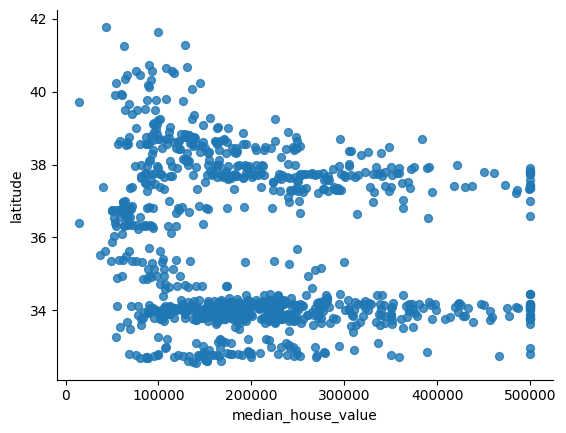

In [ ]:
# @title longitude vs latitude

from matplotlib import pyplot as plt
housing_pd_final.plot(kind='scatter', x='median_house_value', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)
#drop null values

991

In [ ]:
train_pd, test_pd, val_pd = housing_pd_final[:800], housing_pd_final[800:900], housing_pd_final[900:]
len(train_pd), len(test_pd), len(val_pd)
#splitting the data for training, testing and validation

(800, 100, 91)

In [ ]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[:, :8])
#We fit the first 8 columns, as the ones after them represent a True/False value, and have no need to be scaled

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((800, 12), (91, 12), (100, 12))

# Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

#Using Linear Regression
lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)
#mean squared error for train and val

(68682.31626733403, 57544.537048061735)

# K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)
#K-Nearest Neighbours

(65423.64028933148, 63710.41472142561)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)
#Random Forest

(77409.41193239177, 63732.5618671724)

# Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

large_nn = Sequential()
large_nn.add(InputLayer((12,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.01)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 47ms/step - loss: 52234006528.0000 - root_mean_squared_error: 228547.6094 - val_loss: 41114894336.0000 - val_root_mean_squared_error: 202768.0781
Epoch 2/100
25/25 [==============================] - 1s 39ms/step - loss: 17167037440.0000 - root_mean_squared_error: 131023.0391 - val_loss: 9994279936.0000 - val_root_mean_squared_error: 99971.3984
Epoch 3/100
25/25 [==============================] - 1s 40ms/step - loss: 7788939776.0000 - root_mean_squared_error: 88254.9688 - val_loss: 4901134848.0000 - val_root_mean_squared_error: 70008.1094
Epoch 4/100
25/25 [==============================] - 1s 41ms/step - loss: 5610939392.0000 - root_mean_squared_error: 74906.2031 - val_loss: 3983689216.0000 - val_root_mean_squared_error: 63116.4727
Epoch 5/100
25/25 [==============================] - 1s 40ms/step - loss: 5164556800.0000 - root_mean_squared_error: 71864.8516 - val_loss: 3943663104.0000 - val_root_mean_squared_error: 62798.5898
Epoc

In [ ]:
from tensorflow.keras.models import load_model

large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)

3/3 [==============================] - 0s 5ms/step


(65677.8595136637, 57973.83148820428)